In [2]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
sns.set()

In [3]:
# loading the data:
raw_data = pd.read_csv('car_price.csv')
raw_data.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4


In [4]:
# By default, only descriptive for numercial variables 
#In order to include the descriptive also for the categorical, I added (include='all')
raw_data.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000,4345
unique,7,NaN,6,NaN,NaN,4,2,NaN,312
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN,199
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058,NaN
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


In [5]:
#from the descriptive statistics it can be seen the there is 312 unique 'Model'.
#I assumed that this feature cannot add any valuable information to the regression, therefore, i omitted it.
data = raw_data.drop(['Model'],axis=1)
data.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


In [6]:
# searching for null datapoints
data.isnull().sum()

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
dtype: int64

In [7]:
# since,I don't want to complete the missing prices,and null values are less than 5% and , I decided to remove them.
data_no_mv = data.dropna(axis=0)

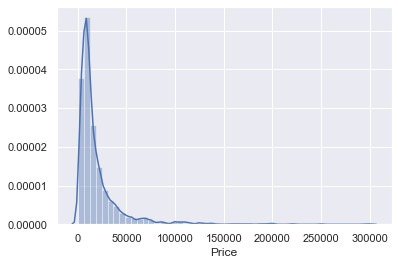

In [8]:
# From probabilty distribtion function it can be seen how price is distributed 
# to spot anomalies from numerical variables
#Price:
sns.distplot(data_no_mv['Price'])

In [9]:
# remove outlayers:
#price:
q = data_no_mv['Price'].quantile(0.99)
data1 = data_no_mv[data_no_mv["Price"]<q]
data1.describe(include='all')
res = data_no_mv[data_no_mv["Price"]>80000]['Price'].count()

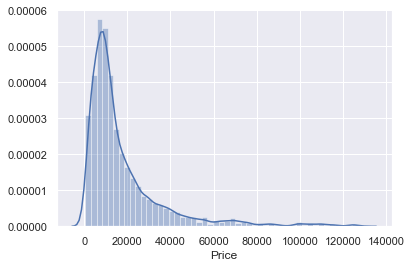

In [10]:
sns.distplot(data1['Price'])

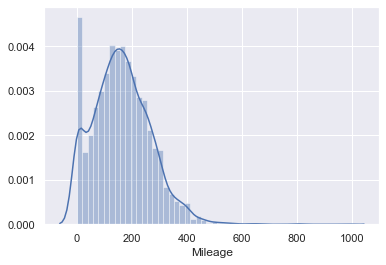

In [11]:
# Mileage:
sns.distplot(data_no_mv['Mileage'])

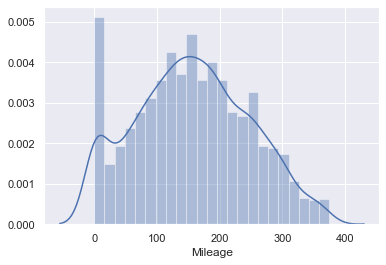

In [12]:
q = data_no_mv['Mileage'].quantile(0.97)
data2 = data1[data1["Mileage"]<q]
sns.distplot(data2['Mileage'])

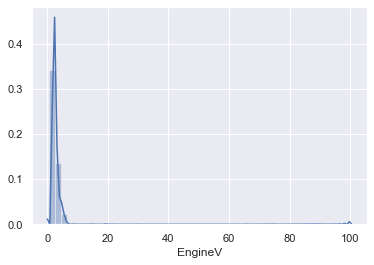

In [13]:
# EngineV:
sns.distplot(data2['EngineV'])

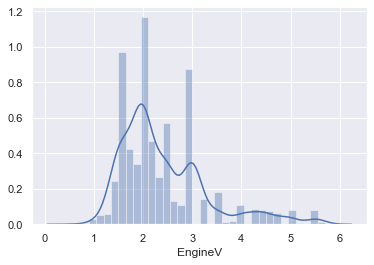

In [14]:
# car engines are likely to be under 6 liters
max_v = 6
data3 = data2[data2['EngineV']<max_v]
sns.distplot(data3['EngineV'])

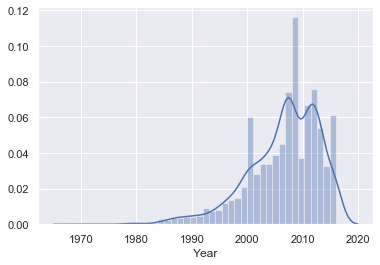

In [15]:
sns.distplot(data3['Year'])

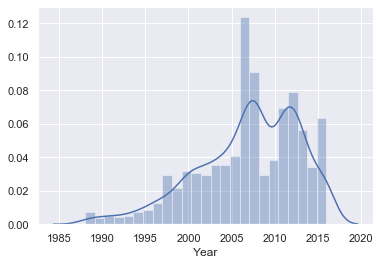

In [16]:
q = data3['Year'].quantile(0.01)
data4 = data3[data3['Year']>q]
sns.distplot(data4["Year"])

In [17]:
data_cleaned = data4.reset_index(drop=True)

In [18]:
data_cleaned.describe()

,Price,Mileage,EngineV,Year
count,3763.000000,3763.000000,3763.000000,3763.000000
mean,18287.745179,155.996014,2.423638,2006.918150
std,19065.221406,90.385907,0.903890,5.950862
min,800.000000,0.000000,0.600000,1988.000000
25%,7400.000000,90.000000,1.800000,2003.000000
50%,11800.000000,155.000000,2.200000,2008.000000
75%,21900.000000,220.000000,3.000000,2012.000000
max,129222.000000,375.000000,5.700000,2016.000000


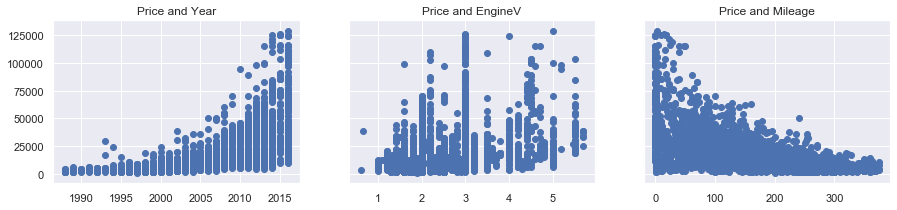

In [19]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, sharey=True, figsize=(15,3))
ax1.scatter(data_cleaned['Year'],data_cleaned['Price'])
ax1.set_title('Price and Year')
ax2.scatter(data_cleaned['EngineV'],data_cleaned['Price'])
ax2.set_title('Price and EngineV')
ax3.scatter(data_cleaned['Mileage'],data_cleaned['Price'])
ax3.set_title('Price and Mileage')


plt.show()

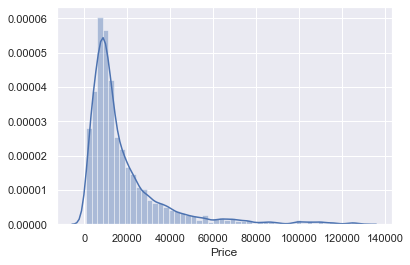

In [20]:
sns.distplot(data_cleaned["Price"])

In [21]:
# the price seemes exponenetially distributed. therefore i'll transform it to to a 'log' price:
log_price = np.log(data_cleaned['Price'])
data_cleaned['log Price'] = log_price
data_cleaned

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,log Price
0,BMW,4200.0,sedan,277,2.00,Petrol,yes,1991,8.342840
1,Mercedes-Benz,13300.0,sedan,358,5.00,Gas,yes,2003,9.495519
2,Audi,23000.0,crossover,240,4.20,Petrol,yes,2007,10.043249
3,Toyota,18300.0,crossover,120,2.00,Petrol,yes,2011,9.814656
4,Audi,14200.0,vagon,200,2.70,Diesel,yes,2006,9.560997
5,Renault,10799.0,vagon,193,1.50,Diesel,yes,2012,9.287209
6,Volkswagen,1400.0,other,212,1.80,Gas,no,1999,7.244228
7,Renault,11950.0,vagon,177,1.50,Diesel,yes,2011,9.388487
8,Renault,2500.0,sedan,260,1.79,Petrol,yes,1994,7.824046
9,Audi,9500.0,vagon,165,2.70,Gas,yes,2003,9.159047


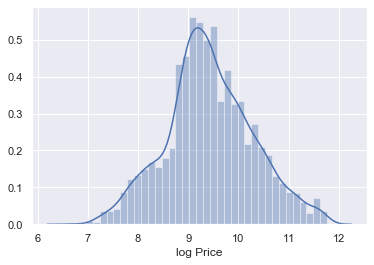

In [22]:
sns.distplot(data_cleaned["log Price"])

In [23]:
data_cleaned.columns.values

array(['Brand', 'Price', 'Body', 'Mileage', 'EngineV', 'Engine Type',
       'Registration', 'Year', 'log Price'], dtype=object)

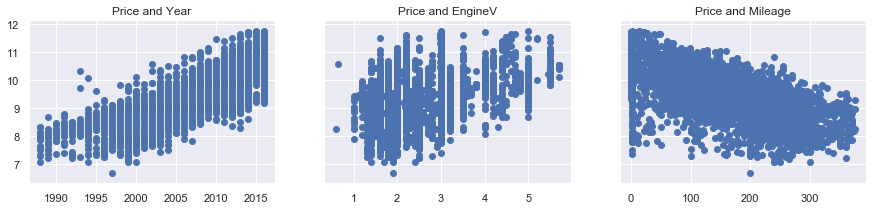

In [24]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, sharey=True, figsize=(15,3))
ax1.scatter(data_cleaned['Year'],data_cleaned['log Price'])
ax1.set_title('Price and Year')
ax2.scatter(data_cleaned['EngineV'],data_cleaned['log Price'])
ax2.set_title('Price and EngineV')
ax3.scatter(data_cleaned['Mileage'],data_cleaned['log Price'])
ax3.set_title('Price and Mileage')


plt.show()

In [25]:
data_cleaned = data_cleaned.drop(['Price'], axis=1)

In [26]:
# checking Multicollinearity:
from statsmodels.stats.outliers_influence import variance_inflation_factor

variables = data_cleaned[['Mileage', 'Year', 'EngineV']]
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif["Features"] = variables.columns

In [27]:
vif

,VIF,Features
0,3.953749,Mileage
1,10.911002,Year
2,8.192713,EngineV


In [28]:
data_no_multicollineartiy = data_cleaned.drop(['Year'],axis=1)
data_no_multicollineartiy

,Brand,Body,Mileage,EngineV,Engine Type,Registration,log Price
0,BMW,sedan,277,2.00,Petrol,yes,8.342840
1,Mercedes-Benz,sedan,358,5.00,Gas,yes,9.495519
2,Audi,crossover,240,4.20,Petrol,yes,10.043249
3,Toyota,crossover,120,2.00,Petrol,yes,9.814656
4,Audi,vagon,200,2.70,Diesel,yes,9.560997
5,Renault,vagon,193,1.50,Diesel,yes,9.287209
6,Volkswagen,other,212,1.80,Gas,no,7.244228
7,Renault,vagon,177,1.50,Diesel,yes,9.388487
8,Renault,sedan,260,1.79,Petrol,yes,7.824046
9,Audi,vagon,165,2.70,Gas,yes,9.159047


In [29]:
data_with_dummies = pd.get_dummies(data_no_multicollineartiy,drop_first=True)
data_with_dummies.shape

(3763, 18)

In [30]:
data_with_dummies.columns.values

array(['Mileage', 'EngineV', 'log Price', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes'],
      dtype=object)

In [31]:
# rearange the columns (y- first):
cols= ['log Price', 'Mileage', 'EngineV', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes']
data_preprocessed = data_with_dummies[cols]
data_preprocessed.head()

,log Price,Mileage,EngineV,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,8.342840,277,2.0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,9.495519,358,5.0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
2,10.043249,240,4.2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
3,9.814656,120,2.0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1
4,9.560997,200,2.7,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1


In [32]:
# linear regression model:
targets = data_preprocessed['log Price']
inputs = data_preprocessed.drop(['log Price'],axis=1)

In [33]:
#scaling the data:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(inputs)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [34]:
inputs_scaled = scaler.transform(inputs)

In [35]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(inputs_scaled,targets, test_size= 0.2, random_state=42)

In [36]:
# create the regression:
reg = LinearRegression()
reg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [37]:
y_hat = reg.predict(x_train)

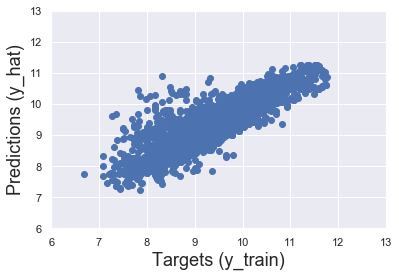

In [38]:
plt.scatter(y_train, y_hat)
plt.xlabel('Targets (y_train)', size=18)
plt.ylabel('Predictions (y_hat)',size=18)
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

Text(0.5, 1.0, 'residuals PDF')

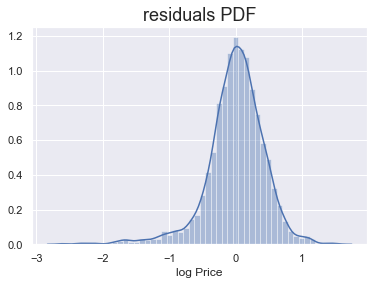

In [39]:
sns.distplot(y_train - y_hat)
plt.title('residuals PDF', size=18)

In [40]:
# R squared
reg.score(x_train,y_train)

0.7425228991700991

In [41]:
reg.intercept_

9.425404406374646

In [42]:
reg.coef_

array([-0.43614753,  0.21128667,  0.01821296,  0.01406737, -0.13596654,
       -0.17564555, -0.05142015, -0.08218497, -0.15281296, -0.10054243,
       -0.19303509, -0.11766936, -0.15851425, -0.12138311, -0.02376593,
       -0.14537191,  0.31967394])

In [43]:
reg_summary = pd.DataFrame(inputs.columns.values, columns=['Features'])
reg_summary['Weights'] = reg.coef_
reg_summary

,Features,Weights
0,Mileage,-0.436148
1,EngineV,0.211287
2,Brand_BMW,0.018213
3,Brand_Mercedes-Benz,0.014067
4,Brand_Mitsubishi,-0.135967
5,Brand_Renault,-0.175646
6,Brand_Toyota,-0.051420
7,Brand_Volkswagen,-0.082185
8,Body_hatch,-0.152813
9,Body_other,-0.100542


In [44]:
# Check the different categories in the 'Brand' variable
data_cleaned['Brand'].unique()

# In this way we can see which 'Brand' is actually the benchmark--> Audi

array(['BMW', 'Mercedes-Benz', 'Audi', 'Toyota', 'Renault', 'Volkswagen',
       'Mitsubishi'], dtype=object)

In [45]:
y_hat_test = reg.predict(x_test)

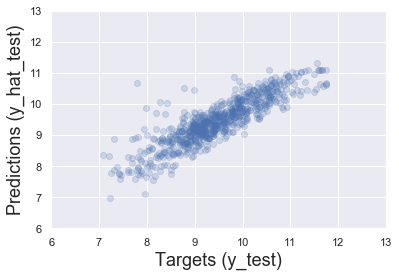

In [46]:
plt.scatter(y_test, y_hat_test, alpha=0.2)
plt.xlabel('Targets (y_test)',size=18)
plt.ylabel('Predictions (y_hat_test)',size=18)
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

In [65]:
df_pf = pd.DataFrame(np.exp(y_hat_test), columns=['Prediction'])
df_pf.head()

,Prediction
0,44039.82
1,5283.39
2,10721.49
3,27323.94
4,4119.03


In [66]:
df_pf['Target'] = np.exp(y_test)
df_pf.head()

,Prediction,Target
0,44039.82,81500.00
1,5283.39,6900.00
2,10721.49,8000.00
3,27323.94,23500.00
4,4119.03,1350.00


In [67]:
y_test = y_test.reset_index(drop=True)
y_test.head()

0   11.31
1    8.84
2    8.99
3   10.06
4    7.21
Name: log Price, dtype: float64

In [68]:
df_pf['Target'] = np.exp(y_test)
df_pf

,Prediction,Target
0,44039.82,81500.00
1,5283.39,6900.00
2,10721.49,8000.00
3,27323.94,23500.00
4,4119.03,1350.00
5,17394.21,18000.00
6,2833.15,3500.00
7,4591.97,6900.00
8,45418.87,58500.00
9,14735.11,17800.00


In [69]:
df_pf['Residual'] = df_pf['Target'] - df_pf['Prediction']

In [70]:
df_pf['Difference%'] = np.absolute(df_pf['Residual']/df_pf['Target']*100)
df_pf

,Prediction,Target,Residual,Difference%
0,44039.82,81500.00,37460.18,45.96
1,5283.39,6900.00,1616.61,23.43
2,10721.49,8000.00,-2721.49,34.02
3,27323.94,23500.00,-3823.94,16.27
4,4119.03,1350.00,-2769.03,205.11
5,17394.21,18000.00,605.79,3.37
6,2833.15,3500.00,666.85,19.05
7,4591.97,6900.00,2308.03,33.45
8,45418.87,58500.00,13081.13,22.36
9,14735.11,17800.00,3064.89,17.22


In [71]:
df_pf.describe()

,Prediction,Target,Residual,Difference%
count,753.00,753.00,753.00,753.00
mean,16524.89,18890.33,2365.44,36.42
std,12908.89,19870.63,11571.66,78.95
min,1055.26,1200.00,-41216.79,0.09
25%,7991.79,7500.00,-2253.31,11.42
50%,12197.69,11990.00,244.17,23.43
75%,21253.92,22500.00,3421.40,41.06
max,80838.37,126000.00,84638.29,1717.37


In [72]:
pd.options.display.max_rows = 999 
pd.set_option('display.float_format', lambda x: '%.2f' % x)
# Finally, I sorted by difference in % and manually check the model
df_pf.sort_values(by=['Difference%'])

,Prediction,Target,Residual,Difference%
646,26873.09,26850.00,-23.09,0.09
392,8365.92,8350.00,-15.92,0.19
431,14472.30,14500.00,27.70,0.19
188,7475.59,7500.00,24.41,0.33
113,6474.60,6500.00,25.40,0.39
340,14356.22,14299.00,-57.22,0.40
18,3815.81,3800.00,-15.81,0.42
455,42707.00,42900.00,193.00,0.45
288,23773.56,23900.00,126.44,0.53
565,39290.26,39500.00,209.74,0.53


In [73]:
#the model not giving very good result.
# maybe i missed somthing on the lower pricees or maybe i dont have a crucial information on the lower price cars (maybe they were demeged).
# more work should be done here.